# Modelling and Fine tuning 

Task consists of follow
1. <h4>Basic Data exploration & assigning variable</h4>

2. <h4>Logistic regression model</h4>
  <ul><li>2.1 Base model</li>
       <li>2.1.1 base model evaluation</li>
  
   <li>2.2 random search</li>
    <li>2.2.1 randomsearch evaluation</li>
     <li></li>
<h4>3. Naive bayes</h4>
    <li>3.1 evaluation </li>
<h4>4. Decision tree</h4>
    <li>4.1 Base model(default model) </li>
       <li>4.1.1 base model evaluation</li>
   4.2 random search
       <li>4.2.1 evaluation</li>
   4.3 grid search
       <li>4.3.1 evaluation </li>
    </ul>

# Libraries that are being used
1. Numpy (array)
2. Pandas (dataframe, series and manipulating data)
3. Matplotlib (for data visulization)
4. Seaborn (nicer matplotlib visulization plot)
5. sklearn.linear_model LogisticRegression for logistic regression
6. sklearn.tree for decision tree classifier model
7. sklearn.metrics for evaluating how well the model does
8. sklearn.model_selection for gridsearchcv and Randomizedsearchcv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix,classification_report,f1_score,plot_roc_curve,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Reading data from Csv

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C61D-20DA

 Directory of C:\Users\HP\OneDrive\Mahidol\Data mining

11/01/2021  08:32 PM    <DIR>          .
10/30/2021  07:19 PM    <DIR>          ..
11/01/2021  08:32 PM    <DIR>          .ipynb_checkpoints
10/30/2021  01:06 PM         1,374,883 colon.csv
10/30/2021  08:28 PM           685,647 Modelling & Fine tuning Pongsakorn.ipynb
10/26/2021  04:55 PM            12,468 original_data.csv
10/12/2021  09:15 AM         3,056,227 predm.csv
10/16/2021  03:24 AM           190,169 predm_Pongsakorn .ipynb
10/30/2021  03:09 PM            70,064 Svm and KNN Pongsakorn.ipynb
08/28/2021  09:27 PM             1,067 svm_margin_plot.py
10/26/2021  04:55 PM             2,527 test.csv
10/26/2021  04:55 PM             7,492 train.csv
11/01/2021  08:32 PM                72 Untitled.ipynb
10/26/2021  04:55 PM             2,527 val.csv
              11 File(s)      5,403,143 bytes
               3 Dir(s)  404,287,184,896 bytes free


In [3]:
original = pd.read_csv('original_data.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

# Data exploration
lets explore how the dataframes look for each set

columns = [row index, age, glu, hdl, ldl,bmi,male,dm]

### Features
1. row index: index of each records indicate the row number.<b>We will drop this feature later as it is not useful for predicting</b>
2. age: The age of the patient 
3. glu data in int
4. hdl in int
5. bmi in float
6. Male is 1 and not male is 0(Female)
7. dm our y 

In [4]:
original.head()

,row_index,age,glu,hdl,ldl,bmi,male,dm
0,0,53.0,110,71,140,30.0,1,0
1,1,53.0,101,56,182,23.0,1,0
2,2,53.0,106,65,115,23.0,1,0
3,3,50.0,114,68,166,26.0,1,1
4,4,53.0,117,32,121,21.0,1,1


In [5]:
train.head()

,row_index,age,glu,hdl,ldl,bmi,male,dm
0,323,41.0,105,62,174,24.0,1,0
1,219,40.0,99,51,216,27.0,1,0
2,39,52.0,101,69,105,24.0,1,0
3,139,47.0,97,41,171,26.0,1,0
4,349,40.0,106,47,211,26.0,1,0


In [6]:
val.head()

,row_index,age,glu,hdl,ldl,bmi,male,dm
0,50,50.0,105,56,153,23.0,1,0
1,245,44.0,110,34,188,22.0,1,0
2,263,38.0,101,35,118,26.0,1,0
3,288,49.0,101,36,152,28.0,1,0
4,84,52.0,99,67,105,24.0,0,0


In [7]:
test.head()

,row_index,age,glu,hdl,ldl,bmi,male,dm
0,368,37.0,103,42,142,24.0,1,0
1,275,39.0,97,58,198,25.0,1,0
2,52,53.0,105,47,198,23.0,1,0
3,162,46.0,106,33,168,27.0,1,1
4,319,41.0,97,53,121,19.0,0,0


In [8]:
print(f'train shape: {train.shape}, test shape: {test.shape}, val shape: {val.shape}')

train shape: (255, 8), test shape: (85, 8), val shape: (85, 8)


# Assign X and Y for each set
to make it more convenience and easy, let's create a function that assign and return X and y for us with the function parameter taking the set as input. The X will be everything except dm column and row_index column(this one doesnt really indicate anything so it is useless lets drop it). Our y will be dm.

In [9]:
def assignxy(sets):
    X = sets.drop(['dm','row_index'],axis = 1)
    y = sets['dm']
    return X,y

In [10]:
X_train, y_train = assignxy(train)
X_val, y_val = assignxy(val)
X_test, y_test = assignxy(test)

In [11]:
X_test.head()

,age,glu,hdl,ldl,bmi,male
0,37.0,103,42,142,24.0,1
1,39.0,97,58,198,25.0,1
2,53.0,105,47,198,23.0,1
3,46.0,106,33,168,27.0,1
4,41.0,97,53,121,19.0,0


# Evaluation function
For convenience, let's create a function that output all the evaluation for us

<b>Function concept</b>
1. Function parameter take in model(estimator), X(input features) and y(output variable)
2. The function then use model.predict() on X to come up with y_pred(predicted output by model)
3. After getting the y_pred, we use it to output all the metrics such as recall, precision, classification report by using sklearn.metrics
4. lastly, it uses the estimator, X and y to plot confusion matrix and roc curve with the help of sklearn.metrics 

In [12]:
def evaluation(model,X,y):
    y_pred = model.predict(X)
    print('Precision:{}\nRecall:{}'.format(precision_score(y,y_pred),recall_score(y,y_pred)))
    print(classification_report(y,y_pred))
    plot_confusion_matrix(model,X,y,cmap=np.random.choice(['plasma', 'viridis']))
    plot_roc_curve(model,X,y)

# Standardization with Pipeline
For best practice as there are wide range of number in some columns lets standardize it and put in pipeline so it will be easier and more convenience.

<b>Standarization Concept</b>
1. Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data

<b>Formula: Z = (x-mean(x))/std(x)</b> this is the same formula as finding Z score the center or mean will be 0. Number will range from -3 to 3

<b>Why Pipeline?</b>
Pipeline helps to make thing easier as it allows us to put thing into step such as fit into scaler and then put into estimator model without calling it one by one.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Logistic regression hyperparameter
calling the function `help` let us know the hyperparameter of the model. <b>The default penalty is l2 </b>

In [14]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

## Logistic regression model in default setting
create a pipeline step that put data into standard scaler first then into logistic regression model(default mode)

In [15]:
scaler = StandardScaler()
logreg = LogisticRegression()
pipebasemodel = Pipeline([('scaler',scaler),('logreg',logreg)])
pipebasemodel.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

# Evaluation on default Logistic regression model
using our created function called evaluation

<b>Insight: The val set have 14 records with dm and model only predicted 1 correctly </b> 
1. Our precision is 0.33 and our recall is 0.07 on predicting dm as 1 and a f1 score of 0.12 this can be bad lets check confusion matrix
2. From the confusion matrix, the model have 69 true postive and 1 true negative. However, it has 2 false positive and 13 false negative means it is bad as in term of dm or not dm we should have less false negative or high recall
3. As this task focus more on Recall( minimizing false negative) the ROC might not be useful

Precision:0.3333333333333333
Recall:0.07142857142857142
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        71
           1       0.33      0.07      0.12        14

    accuracy                           0.82        85
   macro avg       0.59      0.52      0.51        85
weighted avg       0.76      0.82      0.77        85



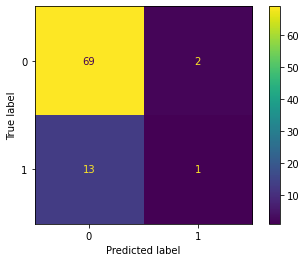

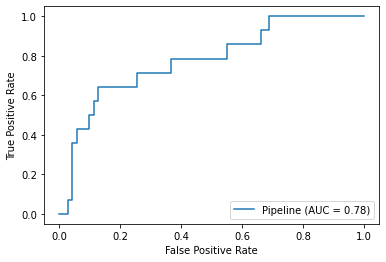

In [16]:
evaluation(pipebasemodel,X_val,y_val)

### Evaluation on test set
<b>Insight:The test set have 14 records with dm and model only predicted 1 correctly </b>
1. Our precision is 0.20 and our recall is 0.07 on predicting dm as 1 and a f1 score of 0.11 this can be bad lets check confusion matrix
2. From the confusion matrix, the model have 67 true postive and 4 true negative. However, it has 3 false positive and 13 false negative means the model still doesnt do well on recall like the val set.

Precision:0.2
Recall:0.07142857142857142
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        71
           1       0.20      0.07      0.11        14

    accuracy                           0.80        85
   macro avg       0.52      0.51      0.50        85
weighted avg       0.73      0.80      0.76        85



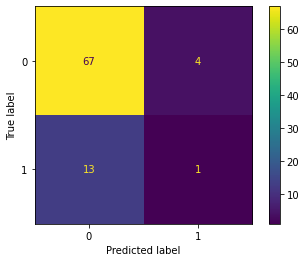

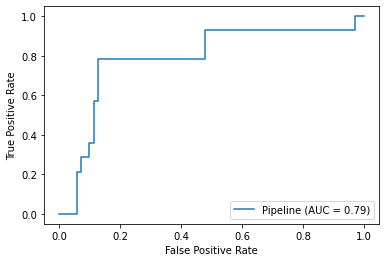

In [17]:
evaluation(pipebasemodel,X_test,y_test)

# Random search on logistic regression
The following code will perform randomsearchcv on a hyperparameter list called space.

<b>Note:</b> Randomsearchcv will select hypermeter from space by random so we will set random_state=42 to make it consistent.If not everytime, we run it will yield different result.

### Randomized search on hyper parameters.

<b>Space:</b> A dictionary that contains the necessary hyparameter list for gridsearch model and randomsearchcv to use as param grid

1. penalty=[l1 lasso, l2 ridge and elasticnet combine both penatly l1 and l2]
2. C set how big or small we want to punish or how strong or weak regularization(smaller stronger and bigger weaker)
3. l1 ratio is like alpha for elasticnet
4. Solver is algorithm to use in the optimization problem. Default is ‘lbfgs’. However, we are also including elasticnet so we need to use solver as saga if not there will be warning.

In [18]:
space = {'logreg__penalty':['l1','l2','elasticnet'],'logreg__C':np.arange(1,11),'logreg__l1_ratio':np.linspace(0,1,10),'logreg__solver':['saga']}

In [19]:
piperandomlogmodel = Pipeline([('scaler',scaler),('logreg',logreg)])
randomsearchlog = RandomizedSearchCV(piperandomlogmodel,space,random_state=42)

<b>Notes:</b> While fitting the warning appear cause of l1_ratio hyperparameter will only be used when penalty is elasticnet. l1 and l2 don't use l1_ratio that is why the warning appear.

In [20]:
randomsearchlog.fit(X_train, y_train)

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logreg', LogisticRegression())]),
                   param_distributions={'logreg__C': [0.01, 0.1, 1, 10, 100],
                                        'logreg__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'logreg__penalty': ['l1', 'l2',
                                                            'elasticnet'],
                                        'logreg__solver': ['saga']},
                   random_state=42)

In [21]:
randomsearchlog.best_params_

{'logreg__solver': 'saga',
 'logreg__penalty': 'l1',
 'logreg__l1_ratio': 0.6666666666666666,
 'logreg__C': 0.01}

# Evaluation on RandomSearch Logistic Model

<b>Insight: The test set have 14 records with dm and model only predicted 1 correctly </b>
1. The randomsearchcv performed worse than the based model as our reduced from 0.33 to 0.25 on validation set.
2. The confusion matrix shows us that the true positive number reduced by 1 from 69 to 68 from the based model and added into false positive this is why there is a reduce in precision.

Precision:0.0
Recall:0.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        71
           1       0.00      0.00      0.00        14

    accuracy                           0.84        85
   macro avg       0.42      0.50      0.46        85
weighted avg       0.70      0.84      0.76        85



C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


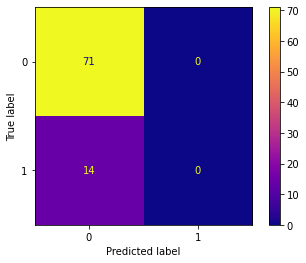

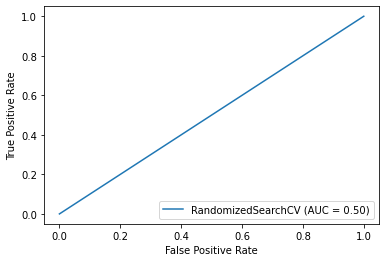

In [22]:
evaluation(randomsearchlog, X_val,y_val)

### Evaluation on test set
<b>Insight: The randomsearchcv model on test set catches 1 out of 14 with dm records correctly it is still unacceptable</b>


C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:0.0
Recall:0.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        71
           1       0.00      0.00      0.00        14

    accuracy                           0.84        85
   macro avg       0.42      0.50      0.46        85
weighted avg       0.70      0.84      0.76        85



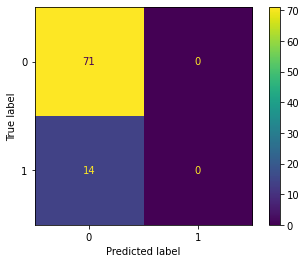

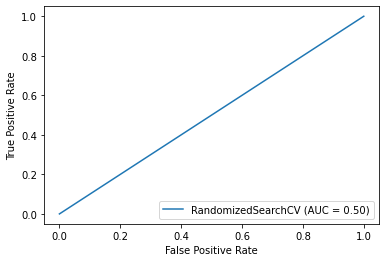

In [23]:
evaluation(randomsearchlog, X_test, y_test)

# Grid search on Logistic Regression 

Gridsearch do a exhaustive search over specified parameter values for an estimator. Searching all the combination of every hyperparameter to find the optimum parameter.

In [24]:
pipegridlogmodel = Pipeline([('scaler',scaler),('logreg',logreg)])
gridlogmodel = GridSearchCV(pipegridlogmodel, space, scoring = 'recall')

<b>Notes:</b> While fitting the warning appear cause of l1_ratio hyperparameter will only be used when penalty is elasticnet. l1 and l2 don't use l1_ratio that is why the warning appear.

In [25]:
gridlogmodel.fit(X_train,y_train)

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\HP\anaconda3\envs\poom\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'logreg__penalty': ['l1', 'l2', 'elasticnet'],
                         'logreg__solver': ['saga']},
             scoring='recall')

### The best param return as what the grid model chosen hyperparameter are

In [26]:
gridlogmodel.best_params_

{'logreg__C': 1,
 'logreg__l1_ratio': 0.0,
 'logreg__penalty': 'l1',
 'logreg__solver': 'saga'}

## Evaluation on gridsearch Logistic Model

The test set have 14 records with dm and model only predicted 1 correctly

Precision:0.25
Recall:0.07142857142857142
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        71
           1       0.25      0.07      0.11        14

    accuracy                           0.81        85
   macro avg       0.54      0.51      0.50        85
weighted avg       0.74      0.81      0.77        85



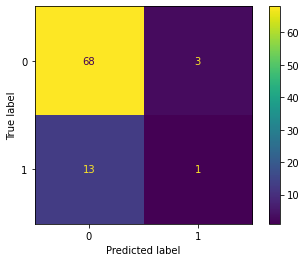

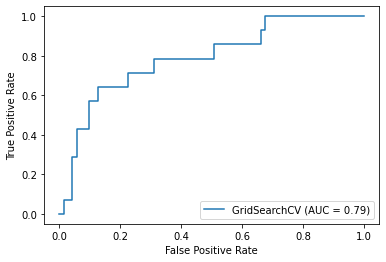

In [27]:
evaluation(gridlogmodel, X_val, y_val)

## Evaluation on test set


The test set have 14 records with dm and model only predicted 1 correctly

Precision:0.2
Recall:0.07142857142857142
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        71
           1       0.20      0.07      0.11        14

    accuracy                           0.80        85
   macro avg       0.52      0.51      0.50        85
weighted avg       0.73      0.80      0.76        85



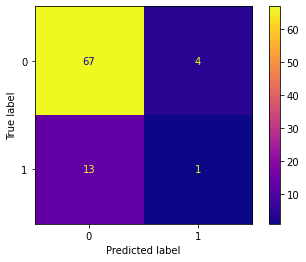

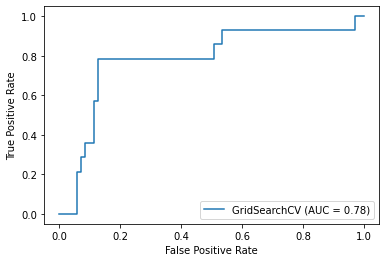

In [28]:
evaluation(gridlogmodel, X_test, y_test)

# Naives bayes model
This section will use GaussianNB from sklearn.naivebayes

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

The GaussianNB has no hyperparameter to tune

In [29]:
naive = GaussianNB()
operations = [('scaler',scaler),('naive',naive)]
pipenaive = Pipeline(operations)
pipenaive.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('naive', GaussianNB())])

## Evaluation on naives bayes model
<b>Insight: The model recieved a precision of 0.57 and low recall of 0.29, this make a high false negative as 10 out of 14 dm patients are label as healthy. </b>

Precision:0.5714285714285714
Recall:0.2857142857142857
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        71
           1       0.57      0.29      0.38        14

    accuracy                           0.85        85
   macro avg       0.72      0.62      0.65        85
weighted avg       0.82      0.85      0.83        85



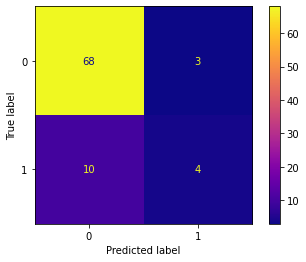

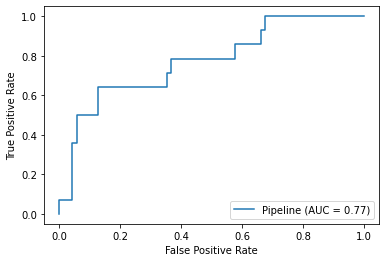

In [30]:
evaluation(pipenaive , X_val, y_val)

## Evaluation on testset
<b>Insight: On the test set it did a slightly better job able to catch 5 dm patients correctly improving the recall to 0.36. this is still consider low as for a task that proritizes recall such as disease screening</b>

Precision:0.4166666666666667
Recall:0.35714285714285715
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        71
           1       0.42      0.36      0.38        14

    accuracy                           0.81        85
   macro avg       0.65      0.63      0.64        85
weighted avg       0.80      0.81      0.81        85



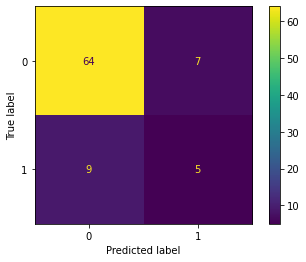

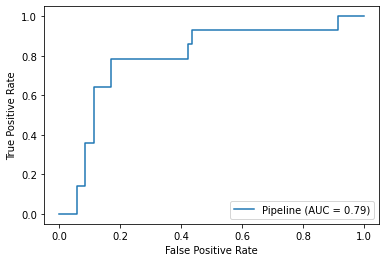

In [31]:
evaluation(pipenaive,X_test, y_test)

# Decision tree

### Default setting decision tree

Firstly, call `help()` to read the documentation and its hyperparameter to understand more

In [32]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [33]:
clf = DecisionTreeClassifier()
operations = [('scaler',scaler),('clf',clf)]
pipebasetree = Pipeline(operations)
pipebasetree.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

### Evaluation on default setting Decision Tree

<b>Insight: The default setting decision tree able to catch only 3 out of 14 dm patients and misses 11 true positive records.</b>

Precision:0.25
Recall:0.21428571428571427
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.25      0.21      0.23        14

    accuracy                           0.76        85
   macro avg       0.55      0.54      0.55        85
weighted avg       0.75      0.76      0.76        85



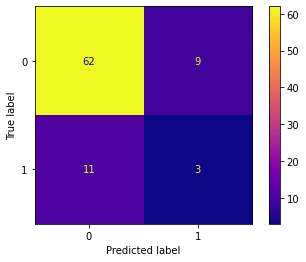

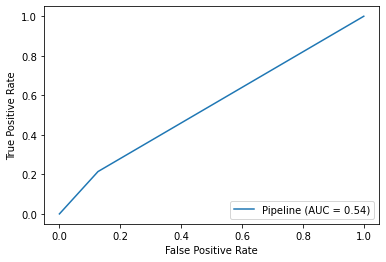

In [43]:
evaluation(pipebasetree,X_val,y_val)

## Random search Decision tree

##### This section will use grid and random search to  search for 3 hyperparameters, which are max_depth, max_leaf_nodes and min_samples_split and criterion

<b>Note:</b> Randomsearchcv will select hypermeter from space by random so we will set random_state=40 to make it consistent.If not everytime, we run it will yield different result.


hyperparameter
1. Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
2. max depth: is set to search from 2-10
3. min_samples_split:The minimum number of samples required to split an internal node is set to search from 2-10
4. max_leaf_nodes: the minimum number of leaf nodes is set to search from 2-10

In [35]:
space = {'clf__criterion' : ["gini", "entropy"],'clf__max_depth':np.arange(2,11),'clf__min_samples_split':np.arange(2,11),'clf__max_leaf_nodes':np.arange(2,11)}
pipetree = Pipeline(operations)
piperandomtree = RandomizedSearchCV(pipetree, space,random_state=40)
piperandomtree.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              DecisionTreeClassifier())]),
                   param_distributions={'clf__criterion': ['gini', 'entropy'],
                                        'clf__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'clf__max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'clf__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=40)

### The hyperparameter that are chosen by randomizedsearch

In [36]:
piperandomtree.best_params_

{'clf__min_samples_split': 3,
 'clf__max_leaf_nodes': 8,
 'clf__max_depth': 2,
 'clf__criterion': 'gini'}

### Evaluation on Random search tree
<b>Insight: The random search model able to predict 2 out of 14 dm patients correctly </b>

Precision:0.4
Recall:0.14285714285714285
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        71
           1       0.40      0.14      0.21        14

    accuracy                           0.82        85
   macro avg       0.62      0.55      0.56        85
weighted avg       0.78      0.82      0.79        85



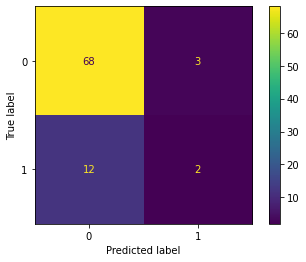

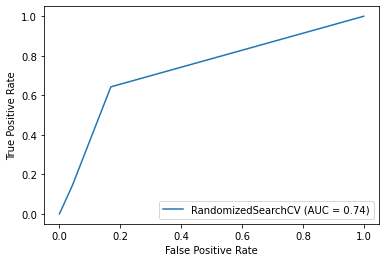

In [37]:
evaluation(piperandomtree, X_val, y_val)

### Evaluation on testset
<b>Insight: The model did the best job out of all model getting 5 out of 14 dm patients correctly in testset than its val set increasing the recall to 0.36, which is still below standard </b>

Precision:0.5555555555555556
Recall:0.35714285714285715
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        71
           1       0.56      0.36      0.43        14

    accuracy                           0.85        85
   macro avg       0.72      0.65      0.67        85
weighted avg       0.83      0.85      0.83        85



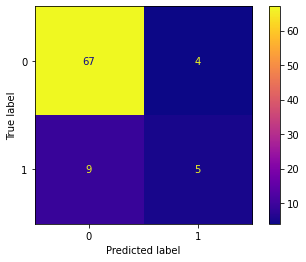

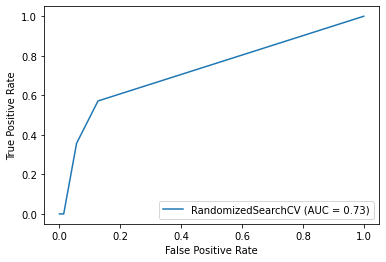

In [38]:
evaluation(piperandomtree, X_test, y_test)

# Grid Decision Tree

In [39]:
pipegridtree = GridSearchCV(pipetree,space)
pipegridtree.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'clf__max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'clf__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

#### This is the hyperparameter the gridsearch has chosen

In [40]:
pipegridtree.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 7,
 'clf__max_leaf_nodes': 10,
 'clf__min_samples_split': 2}

## Evaluation Grid decision tree 
<b>Insight: The gridtree able to detect 3 dm patient out of 14 dm patient this lead to a recall of 0.21.It misclassified 9 dm patients as healthy</b>

Precision:0.375
Recall:0.21428571428571427
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.38      0.21      0.27        14

    accuracy                           0.81        85
   macro avg       0.62      0.57      0.58        85
weighted avg       0.78      0.81      0.79        85



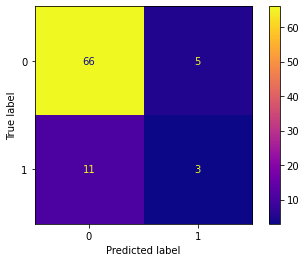

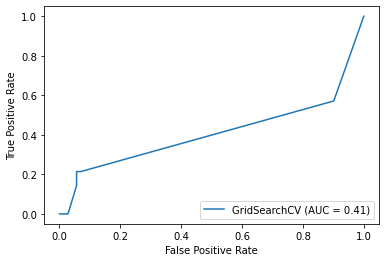

In [41]:
evaluation(pipegridtree,X_val, y_val)

### Evaluation on testset
<b>Insight: The grid tree model performed better in test set than validation getting a recall of 0.29 able to correctly catch 4 true dm patient but still missing more than half(missed 10 out of 14) </b>

Precision:0.4444444444444444
Recall:0.2857142857142857
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.44      0.29      0.35        14

    accuracy                           0.82        85
   macro avg       0.66      0.61      0.62        85
weighted avg       0.80      0.82      0.81        85



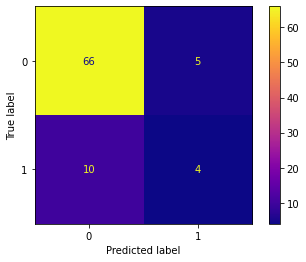

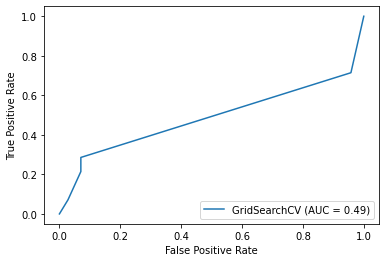

In [42]:
evaluation(pipegridtree, X_test, y_test)